Computation of motion artifaction correction metrics:

1. QC-FC correlation
2. QC-FC distance dependence
3. Modularity quality
4. Modularity quality-motion correlation
5. Recovery of canonical resting state networks (RSNs) via seed-based connectivity 

For computation of RSN recovery via Group ICA, we refer users to the [GIFT toolbox](https://trendscenter.org/software/gift/).

Copyright (c) 2021 The University of Texas Southwestern Medical Center.

In [1]:
import os
import glob
import nilearn.plotting

%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from qctool import QCTool

/project/bioinformatics/DLLab/shared/CondaEnvironments/KevinMoCorr/lib/python3.9/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
Failed to import duecredit due to No module named 'duecredit'


User-specific paths to functional brain atlas and DMN template (binary mask). 

The functional brain atlas is used to compute functional connectivity for the QC-FC, QC-FC distance dependence, modularity quality, and modularity quality-mFD correlation metrics.

This particular DMN template was downloaded from https://brainnexus.com/resting-state-fmri-templates/. 


In [2]:
ATLAS = '/project/bioinformatics/DLLab/Kevin/MotionCorrection/MotionCorrectionCode/atlases/Parcels/Parcels_MNI_333.nii'
DMN = '/project/bioinformatics/DLLab/shared/Atlases/brainnexus templates/rsfmrinetwork_default.nii.gz'

Create lists of fMRI files and corresponding head motion parameter files. We used [FSL MCFLIRT](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/MCFLIRT) to compute these head motion parameters. 

In [3]:
## Example only:

# PROCESSING_DIR = '/project/bioinformatics/DLLab/Vyom/Pipelines/ABIDE1/NYU_041620_ExpandedPipelines'

# lsImages = glob.glob(os.path.join(PROCESSING_DIR, 'sub*', 'motion', '*hmpSaromaSphysioSfreq_bold.nii.gz'))
# lsImages.sort()

# lsHmp = glob.glob(os.path.join(PROCESSING_DIR, 'sub*', 'motion', 'hmp_exp.csv'))
# lsHmp.sort()

Initialize QCTool with the lists of fMRI and head motion parameter files. Processing can be parallelized using the `n_procs` argument. 

In [4]:
qc = QCTool(lsImages, lsHmp, n_procs=4)
qc.set_atlas(ATLAS)

Compute QC-FC and QC-FC distance dependence metrics. 

Computing mean framewise displacement
Computing functional connectivity with the following atlas: /project/bioinformatics/DLLab/Kevin/MotionCorrection/MotionCorrectionCode/atlases/Parcels/Parcels_MNI_333.nii
100%|██████████| 120/120 [11:48<00:00,  5.90s/it]


<AxesSubplot:xlabel='mFD', ylabel='Count'>

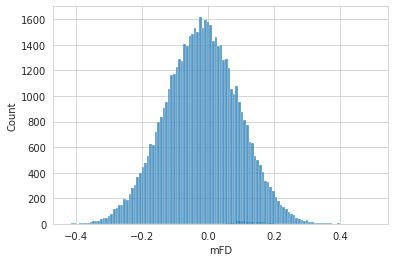

In [5]:
dfQcFc, dictQcFcDD = qc.compute_qcfc()
sns.histplot(qc.dfMfd) # mean framewise displacement
sns.histplot(dfQcFc['QC-FC'])

In [6]:
print('QC-FC distance dependence:')
print(dictQcFcDD)

QC-FC distance dependence:
{'Spearman_r': 0.004287983237572309, 'Spearman_p': 0.31338662364885606, 'Pearson_r': 0.0028478641274723845, 'Pearson_p': 0.5031412843765252}


Compute network modularity quality (using the Louvain algorithm) and modularity quality-mFD correlation. 

<AxesSubplot:xlabel='modularity', ylabel='Count'>

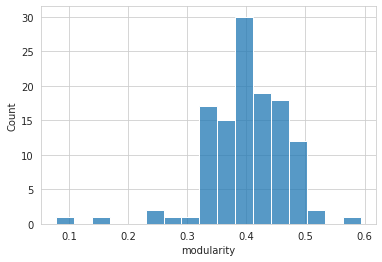

In [7]:
dfModularity, dictModularityFD = qc.compute_modularity()
sns.histplot(dfModularity)

In [8]:
print('Modularity-mFD correlation')
print(dictModularityFD)

Modularity-mFD correlation
{'Spearman_r': 0.10758385999027707, 'Spearman_p': 0.24216813248845886, 'Pearson_r': 0.05515819946999107, 'Pearson_p': 0.5496002935333373}


Compute seed-based connectivity maps using a posterior cingulate seed (4, -54, 26), then binarize at a Z-threshold of 0.4 and compute Dice similarity with the DMN template.

100%|██████████| 120/120 [16:26<00:00,  8.22s/it]


<AxesSubplot:xlabel='sbc_dice', ylabel='Count'>

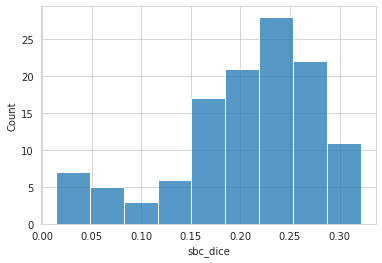

In [9]:
dfSBCDice = qc.compute_sbc_template_dice(DMN, seed=(4, -54, 26), threshold=0.4)
sns.histplot(dfSBCDice)